# 実験課題 パターン認識　第3週目　レポート課題

## レポートについて
＊レポートは配布資料(パターン認識_第3週目_資料.pdf)の「レポートの構成」にしたがってまとめてください。<br>
＊提出物は**レポート**と**課題を実装したjupyter notebookファイル(このファイル)**の二つです。

## レポート課題
課題の解をこのファイル(week3_report.ipynb)に実装してください。<br>課題ファイルにはコメント文でヒントが書かれていますが、必ずしもヒント通りに解く必要はありません（自由に実装していただいて構いません）。

In [1]:
# モジュールの読み込み
import numpy as np  # 計算用
import pandas as pd # データ操作用
import seaborn as sns # データ解析用
import matplotlib.pyplot as plt # グラフ作成用
%matplotlib inline

# sklearn内の関数
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# warningを表示させない
import warnings
warnings.filterwarnings('ignore')

## irisデータの準備
* サンプル数(n)は 150
* 特徴量は 4次元（今回は'petal_length','sepal_width'の2次元だけを使用する）
* クラスは 0: setosa, 1: versicolor, 2: virginica の3クラス

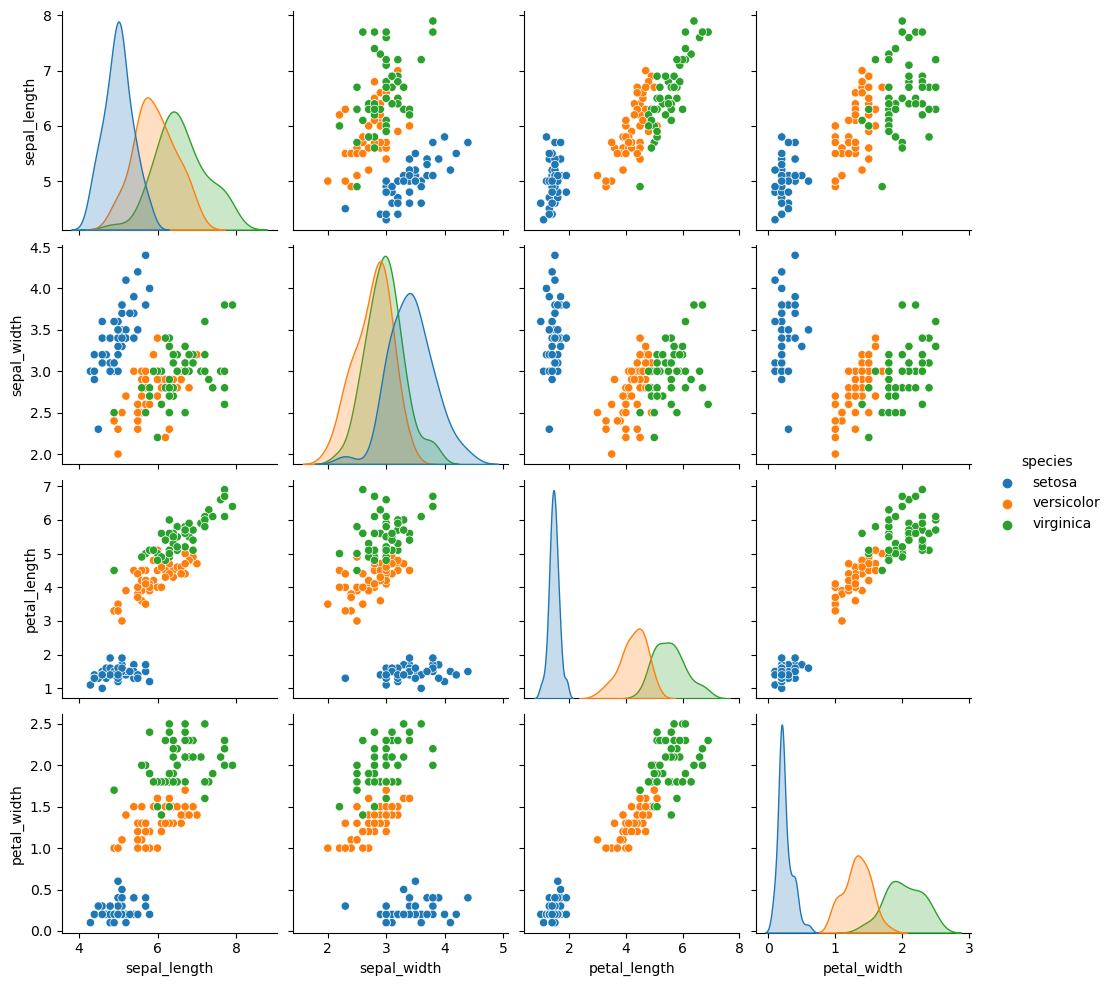

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [2]:
# irisデータの読み込み
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", diag_kind='kde') # データの可視化
plt.show()
print(iris)

In [3]:
#-------- 特徴量Xと正解クラスラベルyの取り出し ----------#
X = np.array(iris[['petal_length','sepal_width']]) # 'petal_length','sepal_width'の2次元特徴とする
y = pd.DataFrame(iris, columns=['species'])
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [4]:
# 簡単化するため、クラス名（setosa, versicolor, virginica）をクラスID（0, 1, 2）に置換
y[y == 'setosa']     = 0
y[y == 'versicolor'] = 1
y[y == 'virginica']  = 2
y = y.astype('int')

In [5]:
# 目的変数yの確認
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
# 学習データとテストデータの分割
# X_train, y_train ・・・ 学習データ (全体の7割)
# X_test, y_test   ・・・ テストデータ (残りの3割)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

In [7]:
# データの標準正規化
sc = StandardScaler() # 正規化処理オブジェクトの生成
X_train = sc.fit_transform(X_train) # X_trainが平均0、標準偏差1になるように正規化
X_test = sc.transform(X_test) # X_trainを使って求めた正規化パラメータをX_testにも適用

## 2クラスの判別分析
### 0: setosa vs 1: versicolorの2クラス分類

In [8]:
# サンプルの抽出
# X_train/y_train, X_test/y_testそれぞれから、setosaとversicolorに該当するサンプルだけを抽出
train_ind_01 = np.squeeze(np.any([np.array(y_train == 0), np.array(y_train == 1)], axis=0))
y_train_01 = y_train[train_ind_01]
X_train_01 = X_train[train_ind_01]

test_ind_01 = np.squeeze(np.any([np.array(y_test == 0), np.array(y_test == 1)], axis=0))
y_test_01 = y_test[test_ind_01]
X_test_01 = X_test[test_ind_01]

### 線形判別分析の手順
1. fit()メソッドを呼び出し、学習を行う
2. モデルに新しいデータを適用する
    * fit()〜predict() / predict_proba()は、(教師あり)クラス分類をするメソッドです
    * fit_transform()〜transform()は、(教師あり)次元削減をするメソッドです

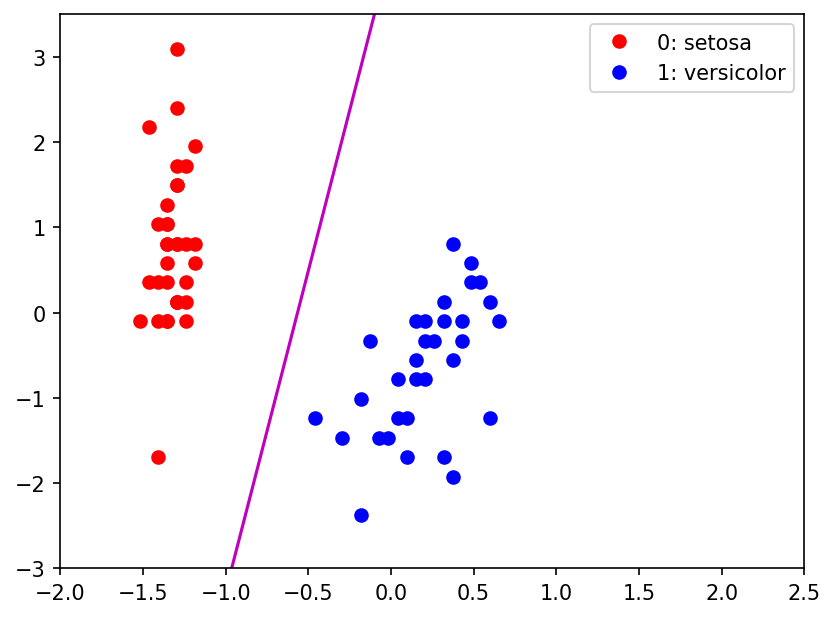

In [9]:
# LDA(線形判別分析)
# X_train_01/y_train_01 を使って2クラス分類器を学習
lda = LDA(n_components=1)
lda.fit(X_train_01, y_train_01)

# 学習した2クラス分類器をX_test_01に適用
y_pred_01 = lda.predict(X_test_01)       # クラス分類結果
p_pred_01 = lda.predict_proba(X_test_01) # 確信度（後の多クラス分類のときに用いる）

#------------------------ 描画 -------------------------#
fig = plt.figure(2, dpi=150)
ax = fig.add_subplot(1, 1, 1)

# クラス0のサンプルの描画
ind_0 = np.squeeze(np.array(y_train_01 == 0))
plt.plot(X_train_01[ind_0,0], X_train_01[ind_0,1], 'ro', label='0: setosa')

# クラス1のサンプルの描画
ind_1 = np.squeeze(np.array(y_train_01 == 1))
plt.plot(X_train_01[ind_1,0], X_train_01[ind_1,1], 'bo', label='1: versicolor')

# 識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda.intercept_[0] + x_*lda.coef_[0][0]) / lda.coef_[0][1]
plt.plot(x_, y_, 'm-')

plt.xlim(-2.0,2.5)
plt.ylim(-3.0,3.5)

plt.legend()
plt.show()

In [10]:
# 識別精度の計算
print('Accuracy: %.2f' % accuracy_score(y_test_01, y_pred_01))

Accuracy: 1.00


## -----------------ここから課題（3クラス分類）-----------------

### 課題1 One-vs-One方式に基づく多クラス線形判別分析を実装し，正解率を求めてください．
#### One-vs-One: 2クラス分類をすべてのクラスの組み合わせについて繰り返す． 

In [11]:
#------------- 0: setosa vs 1: versicolor ---------------#
# サンプル抽出
train_ind_01 = np.squeeze(np.any([np.array(y_train == 0), np.array(y_train == 1)], axis=0))
y_train_01 = y_train[train_ind_01]
X_train_01 = X_train[train_ind_01]

# 線形判別分析
lda_01 = LDA(n_components=1) # 
lda_01.fit(X_train_01, y_train_01)
p_pred_01 = lda_01.predict_proba(X_test) # 確信度

In [12]:
#------------- 0: setosa vs 2: virginica ----------------#
# サンプル抽出
train_ind_02 = np.squeeze(np.any([np.array(y_train == 0), np.array(y_train == 2)], axis=0))
y_train_02 = y_train[train_ind_02]
X_train_02 = X_train[train_ind_02]

# 線形判別分析
lda_02 = LDA(n_components=1) # 
lda_02.fit(X_train_02, y_train_02)
p_pred_02 = lda_02.predict_proba(X_test) # 確信度

In [13]:
#----------- 1: versicolor vs 2: virginica --------------#
# サンプル抽出
train_ind_12 = np.squeeze(np.any([np.array(y_train == 1), np.array(y_train == 2)], axis=0))
y_train_12 = y_train[train_ind_12]
X_train_12 = X_train[train_ind_12]

# 線形判別分析
lda_12 = LDA(n_components=1) # 
lda_12.fit(X_train_12, y_train_12)
p_pred_12 = lda_12.predict_proba(X_test) # 確信度

In [14]:
#------------------------課題1--------------------------#
# 3つの2クラス分類器が求めた確信度から、各クラスの確信度を計算
# クラスのどちらを見るかに注意
p_pred_0 = p_pred_01[:, 0] * p_pred_02[:, 0] # 0: setosa
p_pred_1 = p_pred_01[:, 1] * p_pred_12[:, 0] # 1: versicolor
p_pred_2 = p_pred_02[:, 1] * p_pred_12[:, 1] # 2: versinica

# 最大の確信度を持つクラスに分類 
y_pred_One = np.argmax(np.vstack([p_pred_0, p_pred_1, p_pred_2]).T, axis=1)

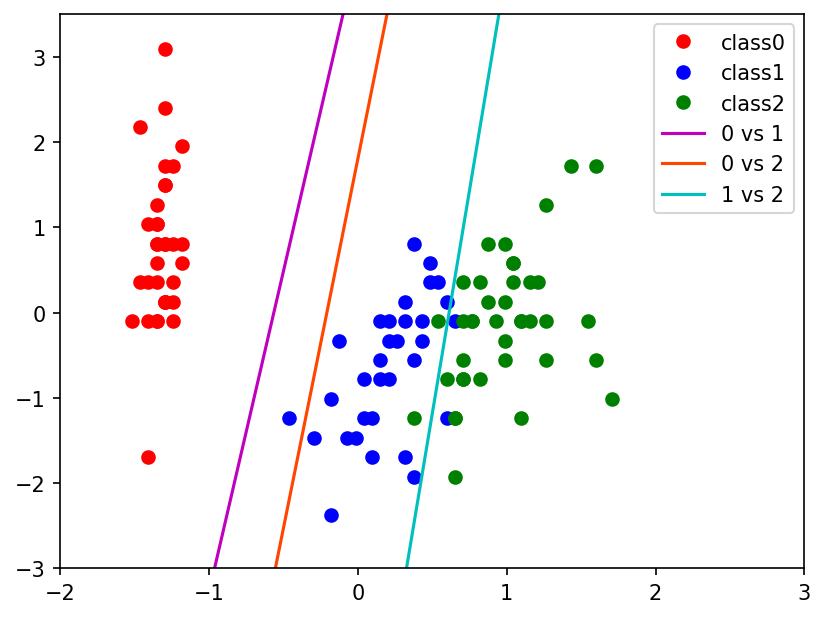

Accuracy: 0.93


In [15]:
#------------------------ 描画 -------------------------#
fig = plt.figure(3, dpi=150)
ax = fig.add_subplot(1, 1, 1)

# クラス0のサンプルの描画
ind_0 = np.squeeze(np.array(y_train == 0))
plt.plot(X_train[ind_0,0], X_train[ind_0,1], 'ro', label='class0')

# クラス1のサンプルの描画
ind_1 = np.squeeze(np.array(y_train == 1))
plt.plot(X_train[ind_1,0], X_train[ind_1,1], 'bo', label='class1')

# クラス2のサンプルの描画
ind_2 = np.squeeze(np.array(y_train == 2))
plt.plot(X_train[ind_2,0], X_train[ind_2,1], 'go', label='class2')

# 0 vs 1の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_01.intercept_[0] + x_*lda_01.coef_[0][0]) / lda_01.coef_[0][1]
plt.plot(x_, y_, 'm-', label='0 vs 1')

# 0 vs 2の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_02.intercept_[0] + x_*lda_02.coef_[0][0]) / lda_02.coef_[0][1]
plt.plot(x_, y_, color='orangered', label='0 vs 2')

# 1 vs 2の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_12.intercept_[0] + x_*lda_12.coef_[0][0]) / lda_12.coef_[0][1]
plt.plot(x_, y_, 'c-', label='1 vs 2')

plt.xlim(-2.0,3.0)
plt.ylim(-3.0,3.5)

plt.legend()
plt.show()

# 識別精度の計算
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_One))

### 課題2 One-vs-All方式に基づく多クラス線形判別分析を実装し，正解率を求めてください．   
#### One-vs-All: 1対その他の2クラス分類をクラス数分繰り返す

In [16]:
#------------- 0: setosa vs 1: versicolor & 2: virginica ---------------# 
# 便宜的にクラス2をクラス1に置換
y_train_0 = y_train.copy() # 深いコピー
y_train_0[y_train_0 == 2] = 1

# 線形判別分析
lda_0 = LDA(n_components=1) # 
lda_0.fit(X_train, y_train_0)
p_pred_0 = lda_0.predict_proba(X_test) # 確信度

In [17]:
#------------- 1: versicolor vs 0: setosa & 2: virginica ---------------#
# 便宜的にクラス2をクラス0に置換
y_train_1 = y_train.copy() # 深いコピー
y_train_1[y_train_1 == 2] = 0

# 線形判別分析
lda_1 = LDA(n_components=1) # 
lda_1.fit(X_train, y_train_1)
p_pred_1 = lda_1.predict_proba(X_test) # 確信度

In [18]:
#------------- 2: virginica vs 0: setosa & 1: versicolor ---------------#
# 便宜的にクラス0をクラス1に置換
y_train_2 = y_train.copy() # 深いコピー
y_train_2[y_train_2 == 0] = 1

# 線形判別分析
lda_2 = LDA(n_components=1) # 
lda_2.fit(X_train, y_train_2)
p_pred_2 = lda_2.predict_proba(X_test) # 確信度

In [19]:
#------------------------ 課題2 --------------------------#
# 各2クラス分類器が求めた確信度から、各クラスの確信度を計算(np.argmaxを使うと良い)
y_pred_All = np.argmax(np.vstack([p_pred_0[:, 0], p_pred_1[:, 0], p_pred_2[:, 0]]).T, axis=1)

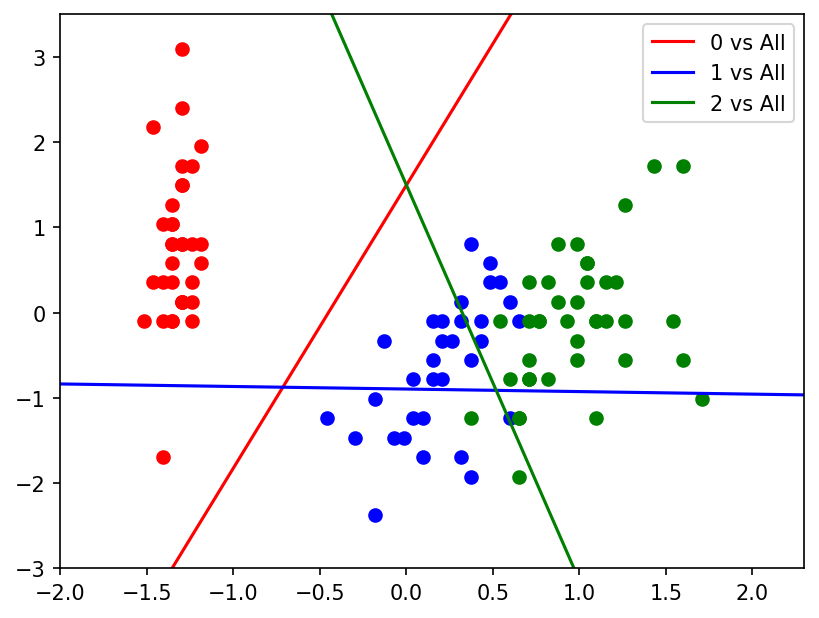

Accuracy: 0.62


In [20]:
#------------------------ 描画 -------------------------#
fig = plt.figure(4, dpi=150)
ax = fig.add_subplot(1, 1, 1)

# クラス0のサンプルの描画
ind_0 = np.squeeze(np.array(y_train == 0))
plt.plot(X_train[ind_0,0], X_train[ind_0,1], 'ro')

# クラス1のサンプルの描画
ind_1 = np.squeeze(np.array(y_train == 1))
plt.plot(X_train[ind_1,0], X_train[ind_1,1], 'bo')

# クラス2のサンプルの描画
ind_2 = np.squeeze(np.array(y_train == 2))
plt.plot(X_train[ind_2,0], X_train[ind_2,1], 'go')

# 0 vs 1,2の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_0.intercept_[0] + x_*lda_0.coef_[0][0]) / lda_0.coef_[0][1]
plt.plot(x_, y_, 'r-', label='0 vs All')

# 1 vs 0,2の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_1.intercept_[0] + x_*lda_1.coef_[0][0]) / lda_1.coef_[0][1]
plt.plot(x_, y_, 'b-', label='1 vs All')

# 2 vs 0,1の識別境界の描画
x_ = np.array([-2,2.3])
y_ = -1*(lda_2.intercept_[0] + x_*lda_2.coef_[0][0]) / lda_2.coef_[0][1]
plt.plot(x_, y_, 'g-', label='2 vs All')

plt.xlim(-2.0,2.3)
plt.ylim(-3.0,3.5)

plt.legend()
plt.show()

# 識別精度の計算
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_All))

### 課題3 One-vs-One方式とOne-vs-All方式の精度の違いとその原因を考察してください．